In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens/')
# from importlib import reload

In [2]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
c=LocalCluster(n_workers=2,processes=False,memory_limit='25gb',threads_per_worker=4,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(c)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38895 instead
  warnings.warn(


In [3]:
len(client.scheduler_info()['workers'])

2

In [4]:
from skylens import *
from survey_utils import *

pid:  46311 3.8.2 (default, Mar 26 2020, 15:53:00) 
[GCC 7.3.0]


In [5]:
#only for python3
import importlib
reload=importlib.reload

In [6]:
zs=lsst_source_tomo_bins()
corr_ll=('shear', 'shear')

ns0:  27.0


In [7]:
wigner_files={}
# wigner_files[0]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr'
# wigner_files[2]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'
wig_home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/'
wigner_files[0]= wig_home+'dask_wig3j_l3500_w2100_0_reorder.zarr'
wigner_files[2]= wig_home+'/dask_wig3j_l3500_w2100_2_reorder.zarr'


# Power Spectrum covariance

In [8]:
#setup parameters
lmax_cl=200
lmin_cl=2
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=20
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=False
tidal_SSV_cov=False
Tri_cov=False

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)

In [9]:
window_lmax=20

In [10]:
use_window=True
do_cov=True

In [11]:
nside=128

In [12]:
unit_window=True

In [13]:
??source_tomo_bins

In [14]:
f_sky=0.3

In [15]:
z0=1 #1087
zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside,unit_win=unit_window,f_sky=f_sky,use_shot_noise=False)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:69: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide


Win gen: step size 384 True False 383 31.0 [0]
Window done. Size: 1.6e-05


../skylens/survey_utils.py:119: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)


In [16]:
store_win=True

In [17]:
do_pseudo_cl=True
do_xi=False

In [18]:
import skylens
reload(skylens)
from skylens import *

In [19]:
#use all ell
use_binned_l=False
kappa00=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=False,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       store_win=store_win,window_lmax=window_lmax,
                                       sparse_cov=False
                                       )

In [20]:
#use all ell
use_binned_l=False
kappa0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       store_win=store_win,window_lmax=window_lmax,
                                       sparse_cov=False
                                       )

In [21]:
use_binned_l=True
kappa_b=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                use_window=use_window,Tri_cov=Tri_cov,
                use_binned_l=use_binned_l,wigner_files=wigner_files,
                SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                store_win=store_win,window_lmax=window_lmax,
                sparse_cov=False
            )

In [22]:
dl=l_bins[1:]-l_bins[:-1]

In [23]:
kappa0.l_bins

array([ 12,  13,  16,  18,  21,  24,  28,  33,  38,  44,  51,  59,  68,
        79,  91, 106, 122, 142, 164, 189])

In [24]:
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [25]:
%time cl00G=kappa00.cl_tomo() 
%time cl0G=kappa0.cl_tomo() 
%time clbG=kappa_b.cl_tomo() 

In [26]:
cl00=client.compute(cl00G['stack']).result()
cl0=client.compute(cl0G['stack']).result()
clb=client.compute(clbG['stack']).result()

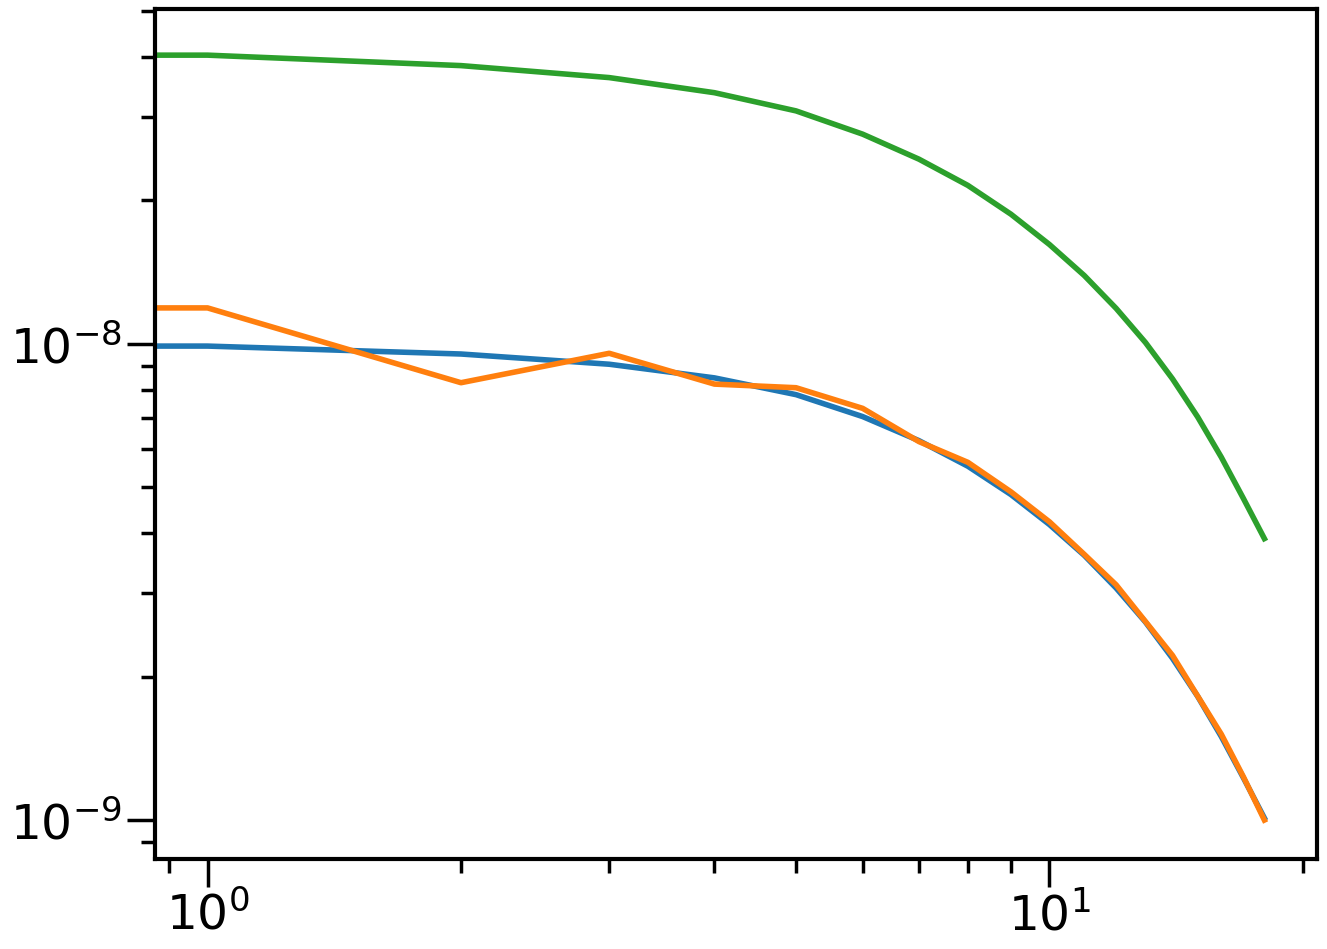

In [27]:
plot(cl0['pcl_b'])
plot(clb['pcl_b'])
plot(cl00['pcl_b'])
loglog()
show()

In [28]:
clb['pcl_b']/cl0['pcl_b']

array([0.45606864, 1.20270993, 0.87042747, 1.05430028, 0.97035419,
       1.03395055, 1.04059573, 0.99537871, 1.01905371, 1.01327616,
       1.01337596, 1.00462384, 1.0155854 , 1.00266438, 1.01422849,
       1.0014512 , 1.01145248, 1.00470935, 0.99025982])

In [29]:
cl00['pcl_b']/clb['pcl_b'] #~4pi fsky.

array([9.07502876, 3.39454215, 4.63337408, 3.79281253, 4.09186184,
       3.81367338, 3.76526358, 3.91831511, 3.81530319, 3.82838747,
       3.82209834, 3.85142836, 3.80710829, 3.85416094, 3.80868266,
       3.85606672, 3.81707102, 3.84214416, 3.89988133])

In [30]:
np.diag(clb['cov']/cl0['cov'])

<ipython-input-30-156bccaf4f69>:1: RuntimeWarning: invalid value encountered in true_divide
  np.diag(clb['cov']/cl0['cov'])


array([0.5       , 1.20292272, 0.79186362, 1.20187584, 0.85818095,
       0.98894134, 1.11277351, 0.90998849, 0.98978445, 1.00064751,
       0.99120746, 1.00029311, 1.00020833, 0.95357153, 1.03436712,
       0.93548885, 1.01950604, 0.99448791, 1.08580781])

In [31]:
def corr_matrix(cov=[]):
    err=np.sqrt(np.diag(cov))
    corr=cov/np.outer(err,err)
    return corr

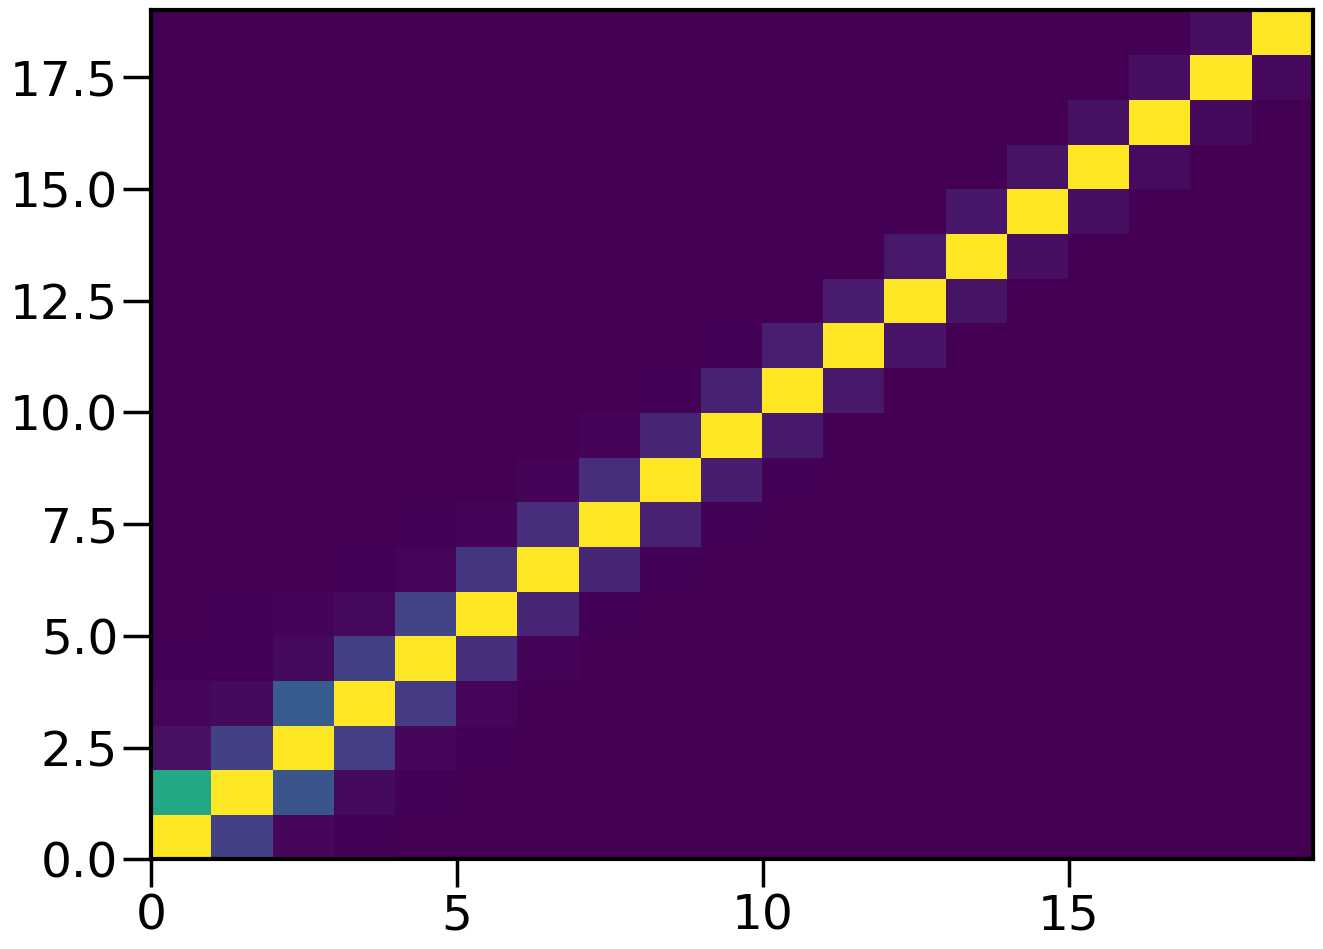

In [32]:
pcolor(corr_matrix(clb['cov']))
plt.show()

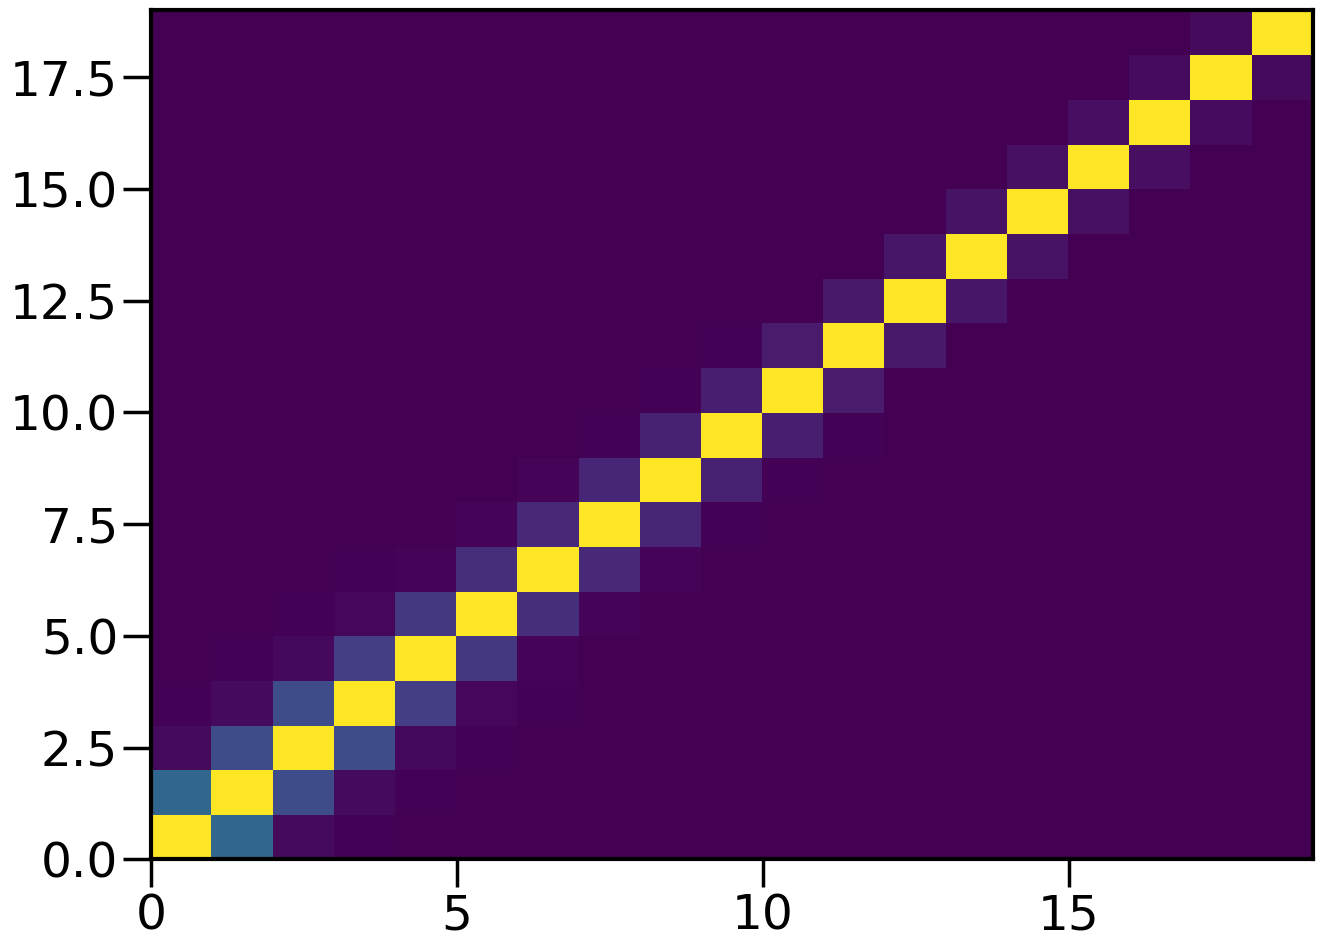

In [33]:
pcolor(corr_matrix(cl0['cov']))

In [38]:
np.diag(cl00['cov']/cl0['cov'])

<ipython-input-38-57a6f7b9c0bb>:1: RuntimeWarning: invalid value encountered in true_divide
  np.diag(cl00['cov']/cl0['cov'])


array([43.14559833, 21.72440123, 25.74200689, 21.49978313, 21.42133313,
       19.69939913, 18.63045105, 18.58755386, 17.89495941, 17.41129791,
       17.03901853, 16.75228688, 16.34388416, 16.18499139, 15.84795094,
       15.7587505 , 15.50617407, 15.41210361, 15.30199126])

In [35]:
2*cl00['pcl_b']**2/np.diag(cl00['cov'])/(2*lb+1)/dl

array([0.28868369, 0.29146009, 0.29188969, 0.29324904, 0.29400718,
       0.29497867, 0.29579571, 0.2962369 , 0.29675279, 0.29718444,
       0.29754692, 0.29785012, 0.29813512, 0.298329  , 0.29848707,
       0.29860493, 0.29869221, 0.29884712, 0.29900055])

In [36]:
bi=(0,0)

In [37]:
m2=kappa0.binning.bin_2d_coupling(cov=kappa0.Win.Win['cl'][corr_ll][bi]['M'],
                                   wt0=kappa_b.Win.Win['cl'][corr_ll][bi]['bin_wt']['wt0'],
                                   wt_b=kappa_b.Win.Win['cl'][corr_ll][bi]['bin_wt']['wt_b'],
                                  bin_utils=kappa0.cl_bin_utils)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
np.diag(m2)

In [ ]:
np.diag(m2),np.diag(kappa_b.Win.Win['cl'][corr_ll][bi]['M'])

In [ ]:
m2/kappa_b.Win.Win['cl'][corr_ll][bi]['M']

In [ ]:
np.all(np.isclose(m2,kappa_b.Win.Win['cl'][corr_ll][bi]['M']))

In [ ]:
x=np.arange(10)

In [ ]:
plot(x,x)